# Cluster Analysis (Unsupervised Learning)

`Goal`: Form groups (clusters) of similar records

Examples of clustering used:
- Periodic table of the elements
- Classification of species
- Grouping securities in portfolios
- Segments of voters

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

import pandas as pd
from pandas.plotting import parallel_coordinates

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Example: Public Utilities

`Goal`: Find clusters of similar utilities

Data: 22 firms, 8 features
- Fixed_charge: Fixed-charge covering ratio
- RoR: Rate of return on capital
- Cost: Cost per kilowatt capacity
- Load_factor: Annual load factor
- Demand_growth: Growth in peak demand
- Sales: Sales
- Nuclear: % nuclear
- Fuel_Cost: Fuel costs per kwh

In [3]:
utilities_df = pd.read_csv('../datasets/Utilities.csv')
utilities_df.set_index('Company', inplace=True)

# conversion of integer data to float will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df.head(30)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


## Compute Euclidean distance matrix

In [4]:
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index).head(10)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


## Normalization

Here are two ways to normalize the input variables. 
1. Pandas calculates by default the sample standard deviation.
2. Scikit-learn uses the population standard deviation. 

The normalized data from the two methods will therefore differ slightly. Using the Pandas approach.

In [5]:
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
print(utilities_df_norm.head(5))

              Fixed_charge       RoR      Cost  Load_factor  Demand_growth  \
Company                                                                      
Arizona          -0.293158 -0.684639 -0.417122    -0.577715      -0.526228   
Boston           -1.214511 -0.194454  0.821002     0.206836      -0.333812   
Central           1.712141  2.078224 -1.339646    -0.891536       0.051019   
Commonwealth     -0.509947  0.206607 -0.004414    -0.219063      -0.943128   
NY                2.037324 -0.862888  0.578233    -1.295019      -0.718643   

                 Sales   Nuclear  Fuel_Cost  
Company                                      
Arizona       0.045903 -0.714629  -0.853675  
Boston       -1.077764  0.792048   0.813297  
Central       0.083931 -0.714629  -0.080431  
Commonwealth -0.701706  1.328020  -0.724202  
NY           -1.581428  0.214389   1.692638  


In [6]:
# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], metric='euclidean')

print(pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)
      .head(10))

Company       Arizona    Boston   Central   Commonwealth        NY  Florida   \
Company                                                                        
Arizona       0.000000  2.010329  0.774179      0.758738  3.021907  1.244422   
Boston        2.010329  0.000000  1.465703      1.582821  1.013370  1.792397   
Central       0.774179  1.465703  0.000000      1.015710  2.432528  0.631892   
Commonwealth  0.758738  1.582821  1.015710      0.000000  2.571969  1.643857   
NY            3.021907  1.013370  2.432528      2.571969  0.000000  2.635573   
Florida       1.244422  1.792397  0.631892      1.643857  2.635573  0.000000   
Hawaiian      1.885248  0.740283  1.156092      1.746027  1.411695  1.228805   
Idaho         1.265638  3.176654  1.732777      2.003230  4.162561  1.764123   
Kentucky      0.461292  1.557738  0.419254      0.629994  2.566439  1.025663   
Madison       0.738650  1.719632  1.102287      0.138758  2.705445  1.722510   

Company       Hawaiian      Idaho  Kent

## Extension to More than 2 Dimensions

Multiple dimensions require formal algorithm with 
- A distance measure
- A way to use the distance measure in forming cluster
  
Consider two algorithms:
- hierarchical 
- non-hierarchical

## Hierarchical Clustering (Using Agglomerative Method)

1. Start with n clusters (each record is its own cluster)
2. Merge two closest records into one cluster
3. At each successive step, the two clusters closest to each other are merged

Dendrogram, from bottom up, illustrates the process

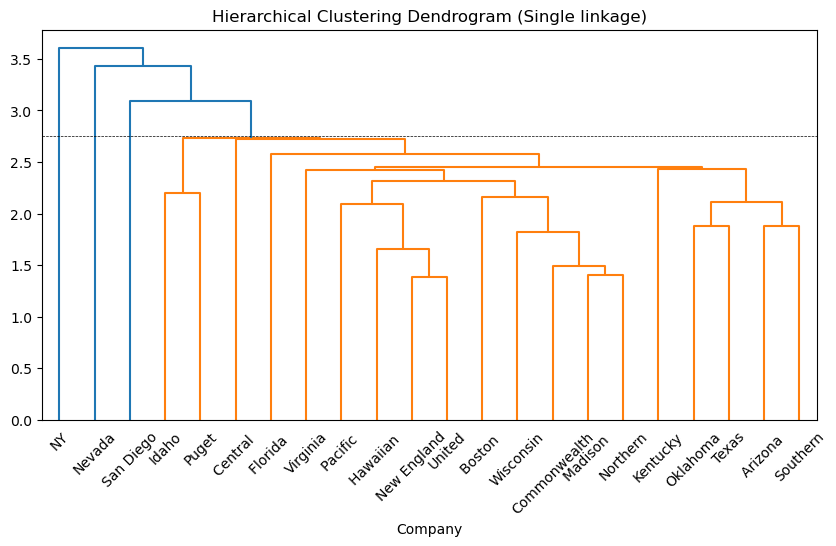

In [7]:
# in linkage() set argument method = 'single', 'complete', 'average', 'weighted', centroid', # 'median', 'ward'
Z = linkage(utilities_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

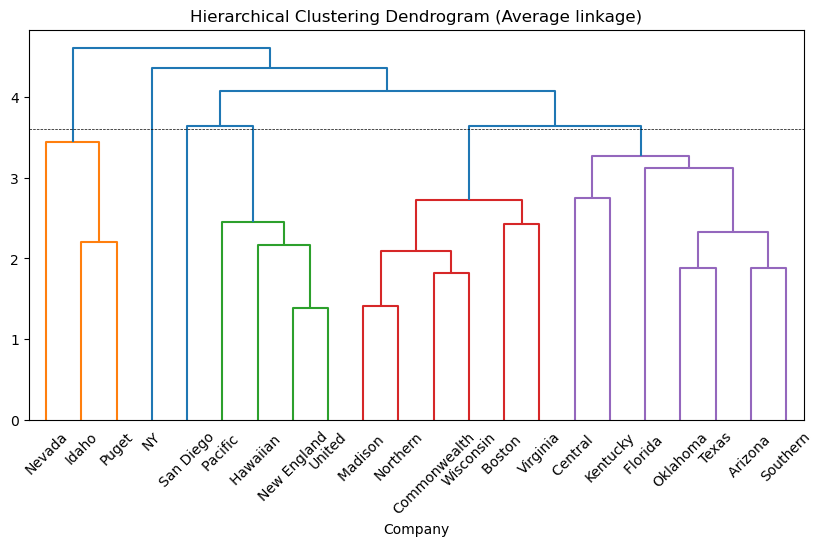

In [8]:
Z = linkage(utilities_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

## Reading the Dendrogram

Process of clustering: Lines connected lower down are merged earlier.  For instance

`New England and United will be merged first, then Madison and Northern`

Determining number of clusters: For a given “distance between clusters”, a horizontal line intersects the clusters that are that far apart, to create clusters

`At distance of 3.6 (horizontal line in the slide) data can be reduced to 6 clusters – 2 singletons, and 4 clusters`

## Finding Cluster Membership

In [9]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [10]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


## Visualize Cluster Features with Heatmap

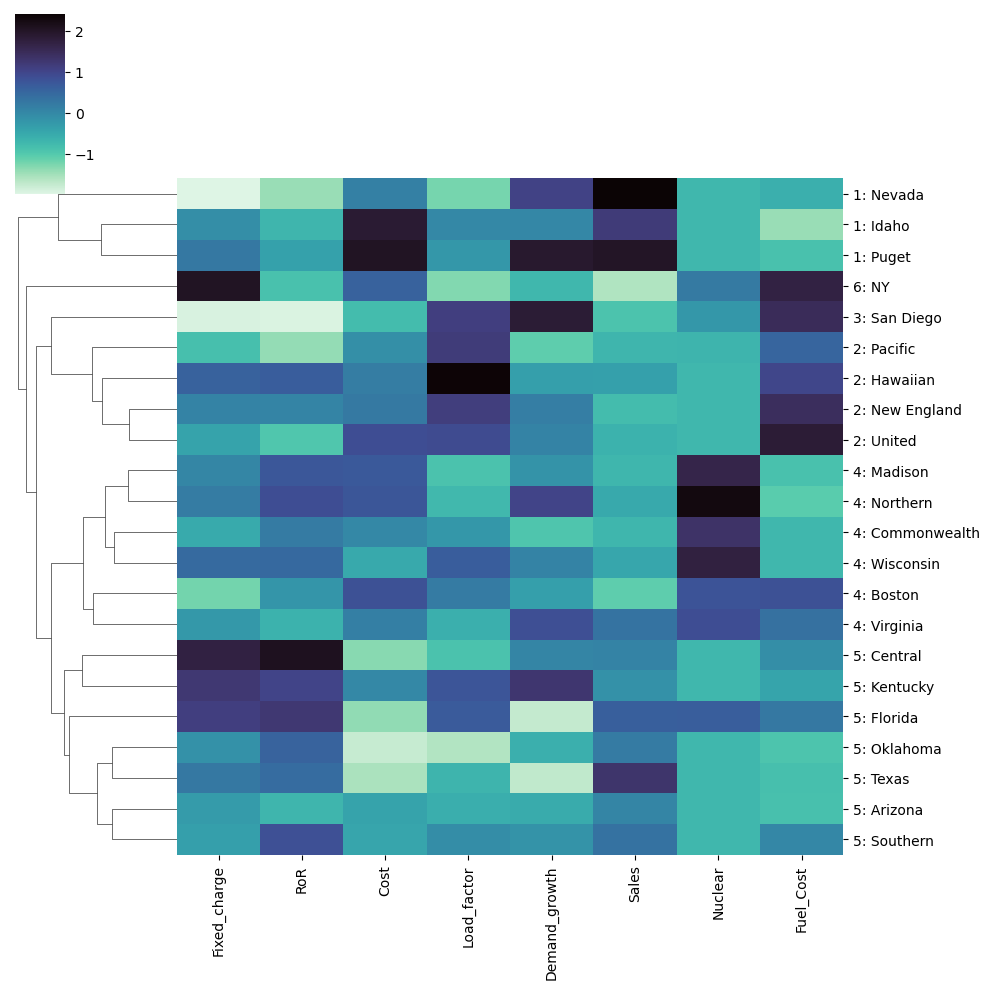

In [11]:
utilities_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, utilities_df_norm.index)]
sns.clustermap(utilities_df_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

## Nonhierarchical Clustering: K-Means Clustering

1. Choose # of clusters desired, k  
2. Start with a partition into k clusters 
3. Often based on random selection of k centroids 
4. At each step, move each record to cluster with closest centroid
5. Recompute centroids, repeat step 3
6. Stop when moving records increases within-cluster dispersion

In [12]:
# Load and preprocess data
utilities_df = pd.read_csv('../datasets/Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# Normalized distance
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# asking for 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

# show the cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
1 :  Boston , Hawaiian , New England, Pacific , San Diego, United
2 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
3 :  NY
4 :  Nevada
5 :  Idaho, Puget


In [13]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
print(centroids)

   Fixed_charge       RoR      Cost  Load_factor  Demand_growth     Sales  \
0     -0.011599  0.339180  0.224086    -0.366466       0.170386 -0.411331   
1     -0.632893 -0.639936  0.206692     1.175321       0.057691 -0.757719   
2      0.516184  0.797896 -1.009097    -0.345490      -0.501098  0.360140   
3      2.085268 -0.883194  0.591840    -1.325495      -0.735555 -1.618644   
4     -2.019709 -1.476137  0.119723    -1.256665       1.069762  2.458495   
5      0.088252 -0.541112  1.995766    -0.109502       0.987702  1.621068   

    Nuclear  Fuel_Cost  
0  1.601868  -0.609460  
1 -0.380962   1.203616  
2 -0.535523  -0.420198  
3  0.219434   1.732470  
4 -0.731447  -0.616086  
5 -0.731447  -1.174696  


In [14]:
withinClusterSS = [0] * 6
clusterCount = [0] * 6
for cluster, distance in zip(kmeans.labels_, kmeans.transform(utilities_df_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (5 members): 10.66 within cluster
Cluster 1 (6 members): 22.20 within cluster
Cluster 2 (7 members): 27.77 within cluster
Cluster 3 (1 members):  0.00 within cluster
Cluster 4 (1 members):  0.00 within cluster
Cluster 5 (2 members):  2.54 within cluster


## How Tight are the Clusters

In [15]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=utilities_df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (5 members): 10.66 within cluster 
Cluster 1 (6 members): 22.20 within cluster 
Cluster 2 (7 members): 27.77 within cluster 
Cluster 3 (1 members): 0.00 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (2 members): 2.54 within cluster 


## Profile Plot: K-means Clustering

   Fixed_charge       RoR      Cost  Load_factor  Demand_growth     Sales  \
0     -0.011599  0.339180  0.224086    -0.366466       0.170386 -0.411331   
1     -0.632893 -0.639936  0.206692     1.175321       0.057691 -0.757719   
2      0.516184  0.797896 -1.009097    -0.345490      -0.501098  0.360140   
3      2.085268 -0.883194  0.591840    -1.325495      -0.735555 -1.618644   
4     -2.019709 -1.476137  0.119723    -1.256665       1.069762  2.458495   
5      0.088252 -0.541112  1.995766    -0.109502       0.987702  1.621068   

    Nuclear  Fuel_Cost    cluster  
0  1.601868  -0.609460  Cluster 0  
1 -0.380962   1.203616  Cluster 1  
2 -0.535523  -0.420198  Cluster 2  
3  0.219434   1.732470  Cluster 3  
4 -0.731447  -0.616086  Cluster 4  
5 -0.731447  -1.174696  Cluster 5  


(-0.5, 7.5)

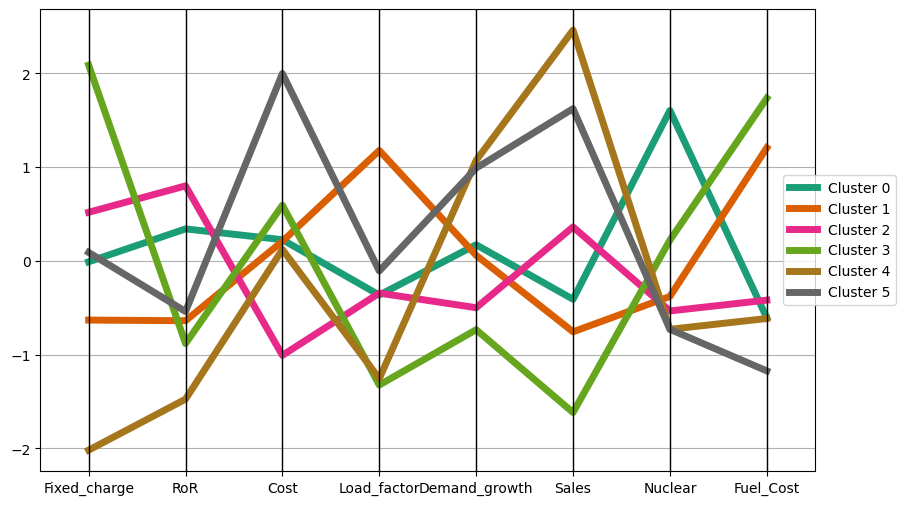

In [16]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
print(centroids)

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [17]:
utilities_df_norm.groupby(kmeans.labels_).mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,-0.011599,0.339180,0.224086,-0.366466,0.170386,-0.411331,1.601868,-0.609460
1,-0.632893,-0.639936,0.206692,1.175321,0.057691,-0.757719,-0.380962,1.203616
2,0.516184,0.797896,-1.009097,-0.345490,-0.501098,0.360140,-0.535523,-0.420198
3,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
4,-2.019709,-1.476137,0.119723,-1.256665,1.069762,2.458495,-0.731447,-0.616086
5,0.088252,-0.541112,1.995766,-0.109502,0.987702,1.621068,-0.731447,-1.174696


## Distances between Clusters

In [18]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  3.327706  2.767756  4.076778  4.756091  3.814743
1  3.327706  0.000000  3.376575  3.982534  4.831882  4.205250
2  2.767756  3.376575  0.000000  4.240989  4.544657  3.933837
3  4.076778  3.982534  4.240989  0.000000  6.613030  5.511431
4  4.756091  4.831882  4.544657  6.613030  0.000000  3.342656
5  3.814743  4.205250  3.933837  5.511431  3.342656  0.000000


In [19]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    18.743074
1    19.723946
2    18.863814
3    24.424763
4    24.088316
5    20.807918
dtype: float64

## Different Choices for K

As the number of clusters increases, the cluster members are closer to one another.

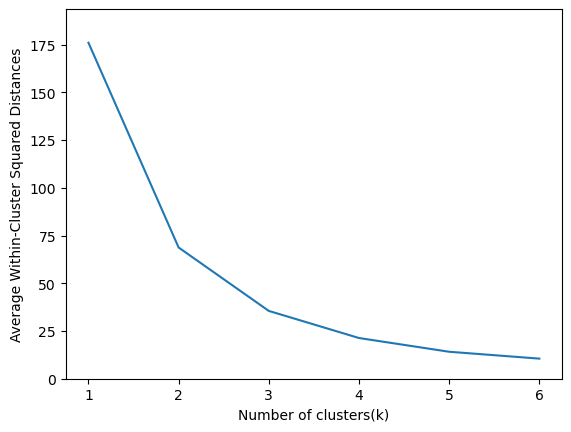

In [20]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
    
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})

ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()